In [1]:
#Install Tensorflow
!pip install tensorflow

In [2]:
import tensorflow as tf  #Imports the TensorFlow library with the alias 'tf' for convenience.
from tensorflow import keras  #Imports the 'keras' module from TensorFlow for building and training neural networks.
from keras.models import Sequential #Imports the 'Sequential' class from 'keras.models' to create a sequential model.
from keras.layers import Dense,Flatten #Imports the 'Dense' and 'Flatten' layers from 'keras.layers' to define the architecture of the neural network.
import numpy as np #Imports the 'numpy' library with the alias 'np' for numerical operations.
import pandas as pd #Imports the 'pandas' library with the alias 'pd' for data manipulation.
import matplotlib.pyplot as plt 

In [3]:
#loading the MNIST Dataset
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
#printing the pixel values for an image
for row in X_train[10000]:
    row=row.tolist()
    for i in row:
        print(str(i).ljust(4), end='')
    print()

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   29  150 195 254 255 254 176 193 150 96  0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   48  166 224 253 253 234 196 253 253 253 253 233 0   0   0   0   0   0   0   0   0   
0   0   0   0   0   93  244 249 253 187 46  10  8   4   10  194 253 253 233 0   0   0   0   0   0   0   0   0   
0   0   0   0   0   107 253 253 230 48  0   0   0   0   0   192 253 253 156 0   0   0   0   0   

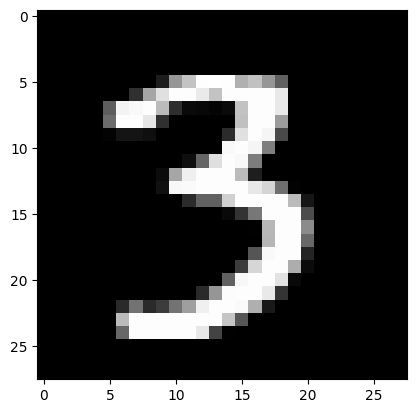

In [15]:
plt.imshow(X_train[10000], cmap='gray')

In [16]:
y_train[10000]

3

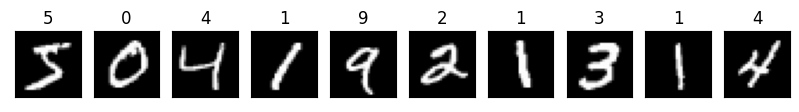

In [17]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [18]:
#Normalize data
X_train=X_train/255
X_test=X_test/255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
#Initializing the  model
model=Sequential()


In [21]:
#creating input layer
input_layer=Flatten(input_shape=(28,28))

In [22]:
#Dense layer- layer 1
layer1=Dense(units=150,activation='relu')

In [23]:
#Dense layer- layer 2
layer2=Dense(units=100,activation='sigmoid')

In [24]:
#creating output layer
output_layer=Dense(units=10, activation='softmax')

In [25]:
#add the layers to model
model.add(input_layer)
model.add(layer1)
model.add(layer2)
model.add(output_layer)

In [21]:
#have a look at model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 133,860
Trainable params: 133,860
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 150) dtype=float32, numpy=
 array([[ 3.9331794e-02, -2.3629546e-02, -5.9531264e-02, ...,
          1.8939376e-05, -7.5552583e-02, -4.8425481e-02],
        [ 3.8692057e-02,  1.4694184e-03, -7.7425778e-02, ...,
          5.4034293e-03, -1.9970004e-02, -3.2433588e-02],
        [ 4.5997426e-02, -1.7105021e-02,  6.9667503e-02, ...,
          2.8384872e-02,  2.9390030e-02,  2.1862693e-02],
        ...,
        [-5.0097093e-02, -4.3520913e-02, -6.2409949e-02, ...,
         -3.1972695e-02, -4.0017720e-02, -4.3926984e-02],
        [ 2.4201885e-02,  1.6686760e-02, -2.3445867e-02, ...,
          1.9552886e-02, -2.8649092e-02,  7.5151041e-02],
        [ 1.8565096e-02,  3.3574849e-03, -6.0478199e-02, ...,
          4.4444442e-02, -1.7548904e-02,  6.6928923e-02]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(150,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.,

In [27]:
model.weights[0]

<tf.Variable 'dense/kernel:0' shape=(784, 150) dtype=float32, numpy=
array([[ 3.9331794e-02, -2.3629546e-02, -5.9531264e-02, ...,
         1.8939376e-05, -7.5552583e-02, -4.8425481e-02],
       [ 3.8692057e-02,  1.4694184e-03, -7.7425778e-02, ...,
         5.4034293e-03, -1.9970004e-02, -3.2433588e-02],
       [ 4.5997426e-02, -1.7105021e-02,  6.9667503e-02, ...,
         2.8384872e-02,  2.9390030e-02,  2.1862693e-02],
       ...,
       [-5.0097093e-02, -4.3520913e-02, -6.2409949e-02, ...,
        -3.1972695e-02, -4.0017720e-02, -4.3926984e-02],
       [ 2.4201885e-02,  1.6686760e-02, -2.3445867e-02, ...,
         1.9552886e-02, -2.8649092e-02,  7.5151041e-02],
       [ 1.8565096e-02,  3.3574849e-03, -6.0478199e-02, ...,
         4.4444442e-02, -1.7548904e-02,  6.6928923e-02]], dtype=float32)>

In [28]:
#compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
#train model 
training_history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),verbose=1)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3339 - accuracy: 0.6930 - val_loss: 0.6779 - val_accuracy: 0.8438
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5407 - accuracy: 0.8669 - val_loss: 0.4294 - val_accuracy: 0.8903
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4005 - accuracy: 0.8931 - val_loss: 0.3553 - val_accuracy: 0.9026
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3443 - accuracy: 0.9047 - val_loss: 0.3134 - val_accuracy: 0.9135
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.9122 - val_loss: 0.2898 - val_accuracy: 0.9190
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2882 - accuracy: 0.9179 - val_loss: 0.2716 - val_accuracy: 0.9241
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2701 - accuracy: 0.9231 - val_loss: 0.2569 - val_accuracy:

In [30]:
training_history.history

{'loss': [1.3338521718978882,
  0.5406877398490906,
  0.4005332887172699,
  0.3442579507827759,
  0.31123021245002747,
  0.28817278146743774,
  0.27014681696891785,
  0.2550162672996521,
  0.2420273721218109,
  0.23047073185443878,
  0.21997642517089844,
  0.2102263867855072,
  0.20122075080871582,
  0.19293996691703796,
  0.18533606827259064,
  0.1779397875070572,
  0.17143012583255768,
  0.16501912474632263,
  0.15894931554794312,
  0.15342622995376587,
  0.14819104969501495,
  0.14320679008960724,
  0.13849444687366486,
  0.13408899307250977,
  0.12984351813793182,
  0.12598532438278198,
  0.12208300083875656,
  0.11858910322189331,
  0.11515563726425171,
  0.1118369773030281],
 'accuracy': [0.6929500102996826,
  0.8669000267982483,
  0.8931166529655457,
  0.9047166705131531,
  0.9121999740600586,
  0.9179499745368958,
  0.9230666756629944,
  0.9269499778747559,
  0.9308000206947327,
  0.9340500235557556,
  0.9368166923522949,
  0.9396166801452637,
  0.9424999952316284,
  0.94481664

In [31]:
result=pd.DataFrame(training_history.history)
result

,loss,accuracy,val_loss,val_accuracy
0,1.333852,0.692950,0.677925,0.8438
1,0.540688,0.866900,0.429443,0.8903
2,0.400533,0.893117,0.355320,0.9026
3,0.344258,0.904717,0.313375,0.9135
4,0.311230,0.912200,0.289762,0.9190
5,0.288173,0.917950,0.271551,0.9241
6,0.270147,0.923067,0.256855,0.9281
7,0.255016,0.926950,0.242207,0.9310
8,0.242027,0.930800,0.232235,0.9344
9,0.230471,0.934050,0.221916,0.9380


<AxesSubplot: >

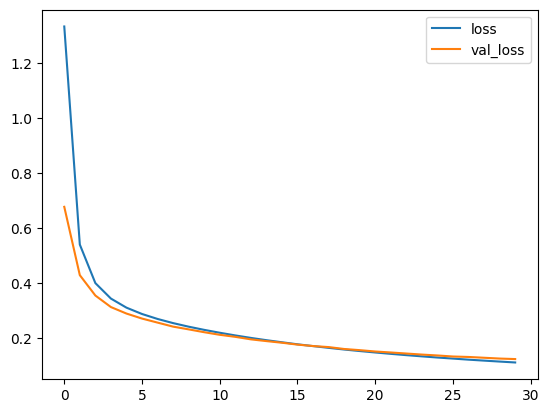

In [32]:
result[["loss","val_loss"]].plot()

<AxesSubplot: >

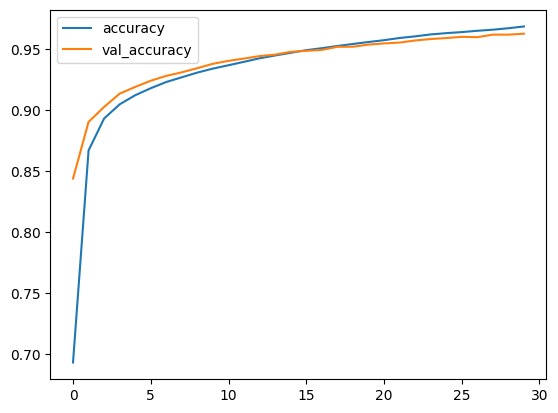

In [33]:
result[["accuracy","val_accuracy"]].plot()

In [35]:
#making predictions
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
y_pred

array([[2.16681601e-05, 6.23071901e-06, 6.89391396e-04, ...,
        9.95744526e-01, 2.99314470e-05, 2.54969404e-04],
       [1.89558591e-03, 1.36142620e-03, 9.77253616e-01, ...,
        9.77304694e-07, 7.49645813e-04, 3.32676109e-07],
       [3.41495388e-06, 9.92646217e-01, 2.07296712e-03, ...,
        2.41947710e-03, 5.67744370e-04, 1.16871983e-04],
       ...,
       [6.61576223e-07, 2.17674756e-06, 4.56581211e-06, ...,
        1.12294445e-04, 3.27577261e-04, 2.58508604e-03],
       [1.55220478e-04, 2.49659206e-04, 2.26472839e-05, ...,
        2.72293801e-05, 3.08050076e-03, 5.68668111e-06],
       [1.07938700e-04, 5.32535660e-06, 2.51403137e-04, ...,
        1.80242296e-07, 4.67559994e-06, 8.37362052e-07]], dtype=float32)

In [40]:
y_pred[0]

array([2.1668160e-05, 6.2307190e-06, 6.8939140e-04, 3.2050796e-03,
       5.5747472e-07, 4.7664929e-05, 4.2246349e-09, 9.9574453e-01,
       2.9931447e-05, 2.5496940e-04], dtype=float32)

In [38]:
y_test[0]

7

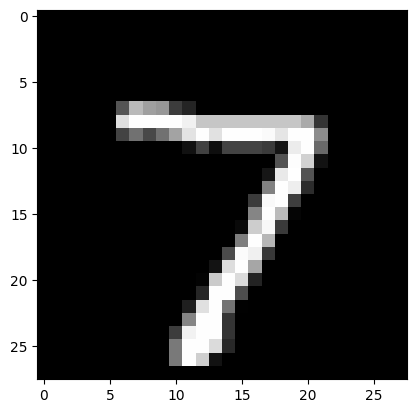

In [39]:
plt.imshow(X_test[0],cmap='gray')

In [41]:
np.argmax(y_pred[0])

7

In [42]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [44]:
y_pred_10=y_pred[0:10]

In [47]:
final_y_predicted=np.argmax(y_pred,axis=1)
final_y_predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

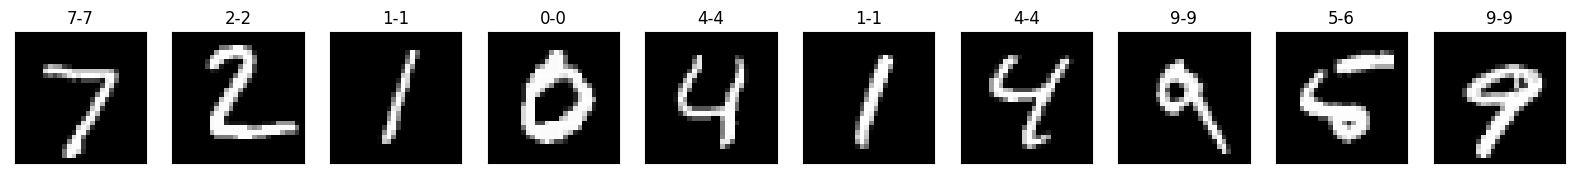

In [48]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(20, 10))
for i in range(10):
    axes[i].set_title(str(y_test[i])+"-"+str(np.argmax(y_pred_10[i])))
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [49]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=final_y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    2,    0,    3,    2,    2,    1,    0],
       [   0, 1119,    1,    3,    0,    1,    4,    2,    5,    0],
       [   7,    2,  991,    9,    6,    0,    3,    9,    4,    1],
       [   1,    0,    7,  977,    0,    7,    0,    9,    6,    3],
       [   1,    0,    5,    0,  948,    0,    7,    2,    2,   17],
       [   6,    3,    0,   15,    2,  845,    9,    2,    6,    4],
       [   9,    3,    1,    0,    8,   12,  921,    1,    3,    0],
       [   0,    9,   11,    4,    1,    2,    0,  991,    0,   10],
       [   4,    2,    4,   16,    3,    7,    6,    5,  922,    5],
       [   8,    6,    1,   14,   21,    1,    1,   11,    2,  944]])>

Text(154.75, 0.5, 'Actual  digit')

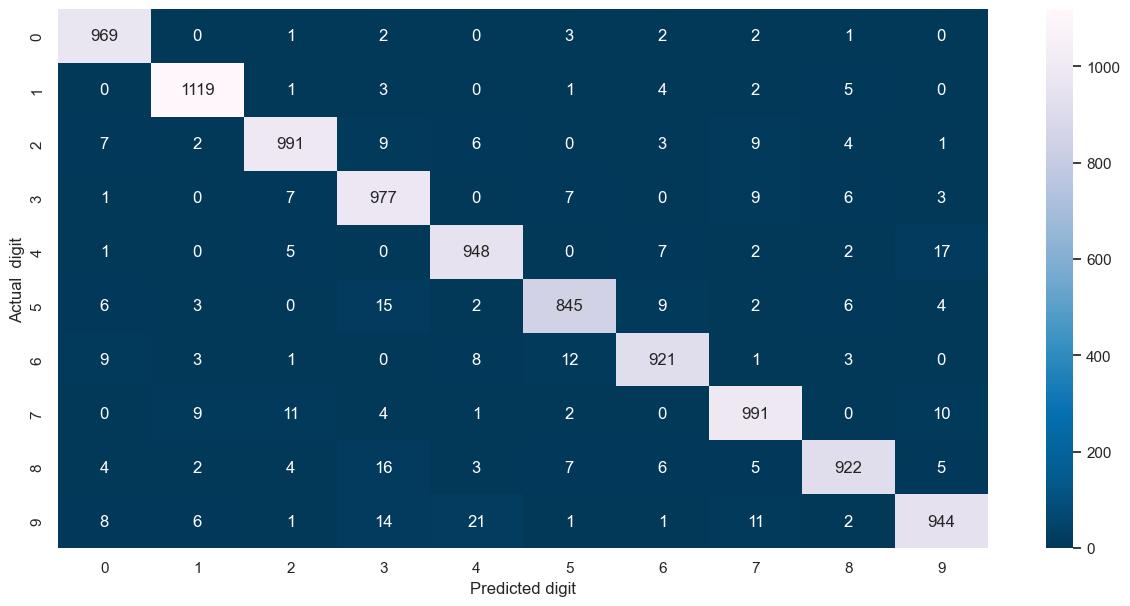

In [50]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(cm,annot=True,cmap='PuBu_r',fmt='g')
plt.xlabel("Predicted digit")
plt.ylabel("Actual  digit") 